Project 2: Test A Perceptual Phenomenon

Louis Friedmann
November 9, 2017

Project Background
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

1. What is our independent variable? What is our dependent variable?

The independen variable is the congruency condition - if the name of the color matches with the ink color.

The dependent variable is the time it take to name the ink color in equal lists

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

There are several hypothiesis that we could chose from. The hypothesis I am going to use is that there is a difference between time used to reconize colors under congruent word condition and inconguent words condition, in specific the Stroop Effect test.

I am referring the the popluation means of congruence words group and incongruence words group (average time for the groups to reconize the colors). Comparing the means directly, we will be able to tell whether there is a difference between the two groups color reconignition times. 
For this test we can not use a popluation like the size of a town or state so the sample that was provided so we can make inference about population means and other population statistics to build other statitics that will include standard errors.
To achieve this, a two-sided T-test will be used to verify. This is neede to address the uncertainity in the sample standard error resulted from the estimate population eviation. Alos, comparing the means of two groups that are dependent. Last is the subject that is involved with both conditions.

Hypothesis to test:

    H0: mu_diff = 0 (The difference between population is 0)
    
    HA: mu_diff != (The difference betweepm population is not 0 )

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [12]:
# First we load the data and display it
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
stroop_effect = pd.read_csv('C:/Users/fdv/Desktop/School Docs/Data Science/stroopdata.csv')
stroop_effect.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [13]:
stroop_effect['Differences'] = stroop_effect['Congruent'] - stroop_effect['Incongruent']
stroop_effect.head()

,Congruent,Incongruent,Differences
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [14]:
# calculate and display average, std and n for both samples and their difference
con_avg = stroop_effect['Congruent'].mean()
con_med = stroop_effect['Congruent'].median()
con_S = stroop_effect['Congruent'].std()
con_n = stroop_effect['Congruent'].count()
incon_avg = stroop_effect['Incongruent'].mean()
incon_med = stroop_effect['Incongruent'].median()
incon_S = stroop_effect['Incongruent'].std()
incon_n = stroop_effect['Incongruent'].count()
diff_avg = stroop_effect['Differences'].mean()
diff_med = stroop_effect['Differences'].median()
diff_S = stroop_effect['Differences'].std()
diff_n = stroop_effect['Differences'].count()
print("The Congruent test results have %.2f as a mean with a standard deviation of %.2f for a total sample size of %.2f" %(con_avg, con_S, con_n))
print("The Incongruent test results have %.2f as a mean with a standard deviation of %.2f for a total sample size of %.2f" %(incon_avg, incon_S, incon_n))

The Congruent test results have 14.05 as a mean with a standard deviation of 3.56 for a total sample size of 24.00
The Incongruent test results have 22.02 as a mean with a standard deviation of 4.80 for a total sample size of 24.00


In [15]:
statstable = pd.DataFrame(
    {'1. Congruent' : pd.Series([con_n, con_avg, con_med, con_S], index=['Sample size', 'Mean', 'Median', 'Std']),
     '2. Incongruent' : pd.Series([incon_n, incon_avg, incon_med, incon_S], index=['Sample size', 'Mean', 'Median', 'Std']),
     '3. Differences' : pd.Series([diff_n, diff_avg, diff_med, diff_S], index=['Sample size', 'Mean', 'Median', 'Std'])})

# a bit later I found out you can just use the describe function.
stroop_effect.describe()

,Congruent,Incongruent,Differences
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


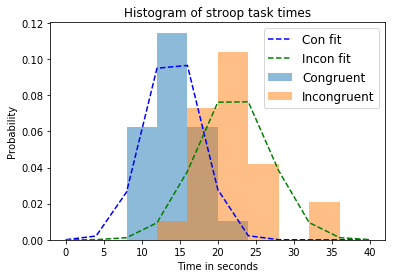

This represents the distribution of total time per task. The darker region shows the overlap for the congruent and incongruent tasks.


In [19]:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
import matplotlib.mlab as mlab
%pylab inline

num_bins = 10
plt.figure()

# Display histogram and fit for the congruent task
n, bins, patches = plt.hist(x=stroop_effect['Congruent'], bins=num_bins, range=(0,40), normed=True, label='Congruent', stacked=False, alpha=0.5)
y = mlab.normpdf(bins, con_avg, con_S)
plt.plot(bins, y, 'b--', label='Con fit')

# Display histogram and fit for the incongruent task
n, bins, patches = plt.hist(x=stroop_effect['Incongruent'], bins=num_bins, range=(0,40), normed=True, label='Incongruent', stacked=False, alpha=0.5)
z = mlab.normpdf(bins, incon_avg, incon_S)
plt.plot(bins, z, 'g--', label='Incon fit')

#legend, labels and title
plt.legend(prop={'size': 12})
plt.xlabel('Time in seconds')
plt.ylabel('Probability')
plt.title('Histogram of stroop task times')

plt.show()
plt.close()
print("This represents the distribution of total time per task. The darker region shows the overlap for the congruent and incongruent tasks.")

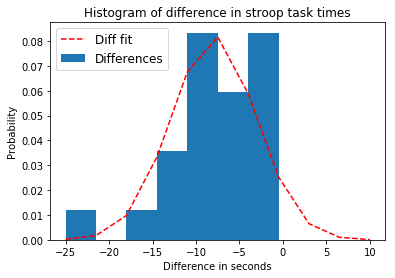

What you see here is the probability distribution of the difference of the paired samples. You can see that a lot of values are below zero meaning that the incongruent tasks in these samples took longer than the congruent task.


In [20]:
num_bins = 10
plt.figure()

# Display histogram and fit for the differences
n, bins, patches = plt.hist(x=stroop_effect['Differences'], bins=num_bins, range=(-25,10), normed=True, label='Differences')
d = mlab.normpdf(bins, diff_avg, diff_S)
plt.plot(bins, d, 'r--', label='Diff fit')

#legend, labels and title
plt.legend(prop={'size': 12})
plt.xlabel('Difference in seconds')
plt.ylabel('Probability')
plt.title('Histogram of difference in stroop task times')

plt.show()
print("This represents the distribution of the difference of paired samples. You can see that a lot of values are below zero meaning that the incongruent tasks in these samples took longer than the congruent task.")

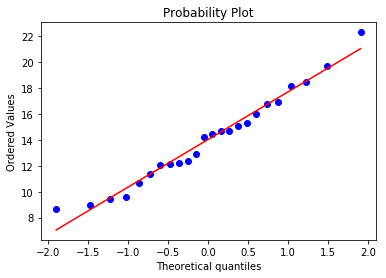

In [21]:
# http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.probplot.html
from scipy import stats
plt.figure()
con_prob = stats.probplot(stroop_effect['Congruent'], plot=plt)

plt.show()

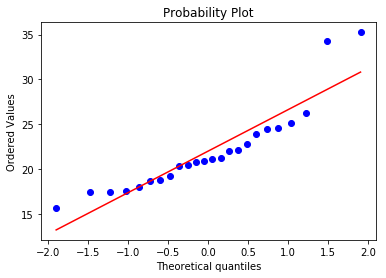

In [22]:

plt.figure()
incon_prob = stats.probplot(stroop_effect['Incongruent'], plot=plt)

plt.show()

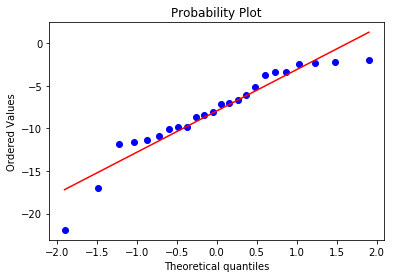

In [23]:
plt.figure()
incon_prob = stats.probplot(stroop_effect['Differences'], plot=plt)

plt.show()

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [24]:
t_value = (con_avg - incon_avg) / (diff_S / math.sqrt(24))
df = diff_n - 1
t_critical = -2.5
CI_lower = diff_avg - 2.807*(diff_S/math.sqrt(24))
CI_upper = diff_avg + 2.807*(diff_S/math.sqrt(24))
cohens_d = diff_avg / diff_S
print("t(%s) = %.4f, p < 0.001, One-tailed negative direction" %(df, t_value))
print("Critical statistic value is %.2f" %(t_critical))
print("Confidence interval on the mean difference")
print("99%% CI = (%.4f,%.4f)" %(CI_lower, CI_upper))

t(23) = -8.0207, p < 0.001, One-tailed negative direction
Critical statistic value is -2.50
Confidence interval on the mean difference
99% CI = (-10.7522,-5.1774)


An alpha level of .01 was chossen to equal the t critical value of -2.5 as it relates for the one-tailed/negative direction) test. All in the the critical area has a probability of p <0.01. In this case we have a t-stat of -8.020.7 which is below the t-critical value and has a probability of p < 0.001.

Base on the results we reject the null and can say that there is a statiscally significatn effect in the negative deirection. Incongruent tasks takes more time that the congruent ones. I thought that results where close to what I expected. 

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Reading a word is more autonomous than idenifying what the work means. Not replying the first thing that comes you is very difficult. You can also use word patterens to where the brain idenifies the patteren and based on an automated response will not even look at the next word in the patteren.

References:
http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/ http://pandas.pydata.org/
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.probplot.html http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
https://en.wikipedia.org/wiki/Eriksen_flanker_task
